In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
%matplotlib inline

In [2]:
#1.1
data = pd.read_csv('cubic_zirconia.csv').drop('Unnamed: 0', axis=1)

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [6]:
data.shape

(26967, 10)

In [7]:
data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [8]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat       0.65
depth       1.50
table       3.00
x           1.84
y           1.83
z           1.14
price    4415.00
dtype: float64


In [9]:
data.cov() # Prints the covariance of each attribute against every other attribute

,carat,depth,table,x,y,z,price
carat,0.228241,0.023844,0.193742,0.526403,0.524250,0.323839,1.773678e+03
depth,0.023844,1.996174,-0.939265,-0.029813,-0.040760,0.100411,-1.459691e+01
table,0.193742,-0.939265,4.982127,0.494228,0.474596,0.239574,1.140420e+03
x,0.526403,-0.029813,0.494228,1.273549,1.266851,0.777946,4.025446e+03
y,0.524250,-0.040760,0.474596,1.266851,1.359690,0.780563,4.018538e+03
z,0.323839,0.100411,0.239574,0.777946,0.780563,0.519298,2.466906e+03
price,1773.677848,-14.596911,1140.419986,4025.446081,4018.537829,2466.905683,1.619954e+07


In [10]:
print("data:",data.median())

data: carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64


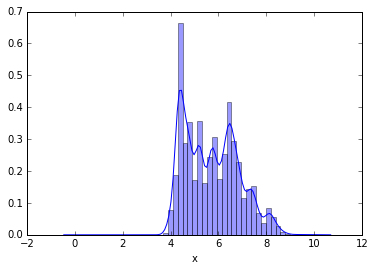

In [11]:
sns.distplot(data['x'])

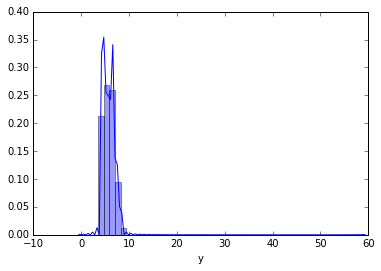

In [12]:
sns.distplot(data['y'])

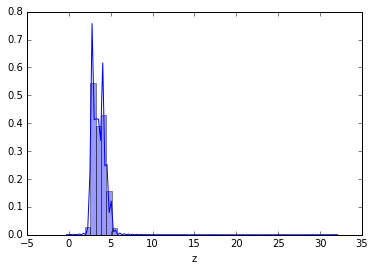

In [13]:
sns.distplot(data['z'])

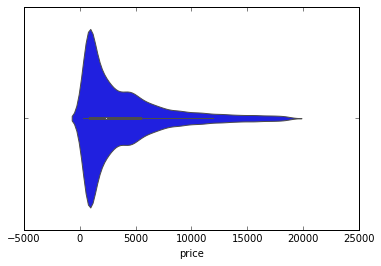

In [14]:
sns.violinplot(data['price'])

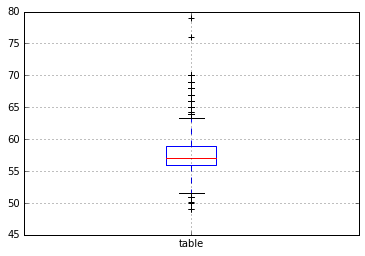

In [15]:
data.boxplot(column=['table'])

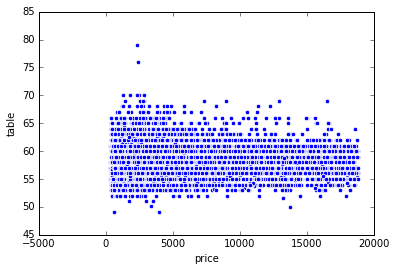

In [16]:
sns.scatterplot(data['price'], data['table'])

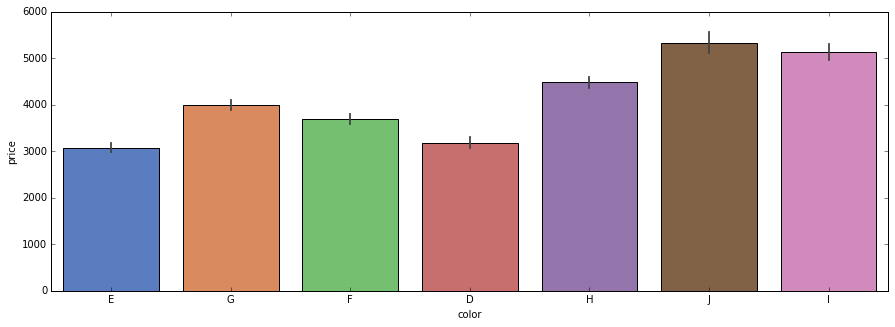

In [17]:
plt.figure(figsize=(15,5))  # setting the figure size
ax = sns.barplot(x='color', y='price', data=data, palette='muted')  # barplot

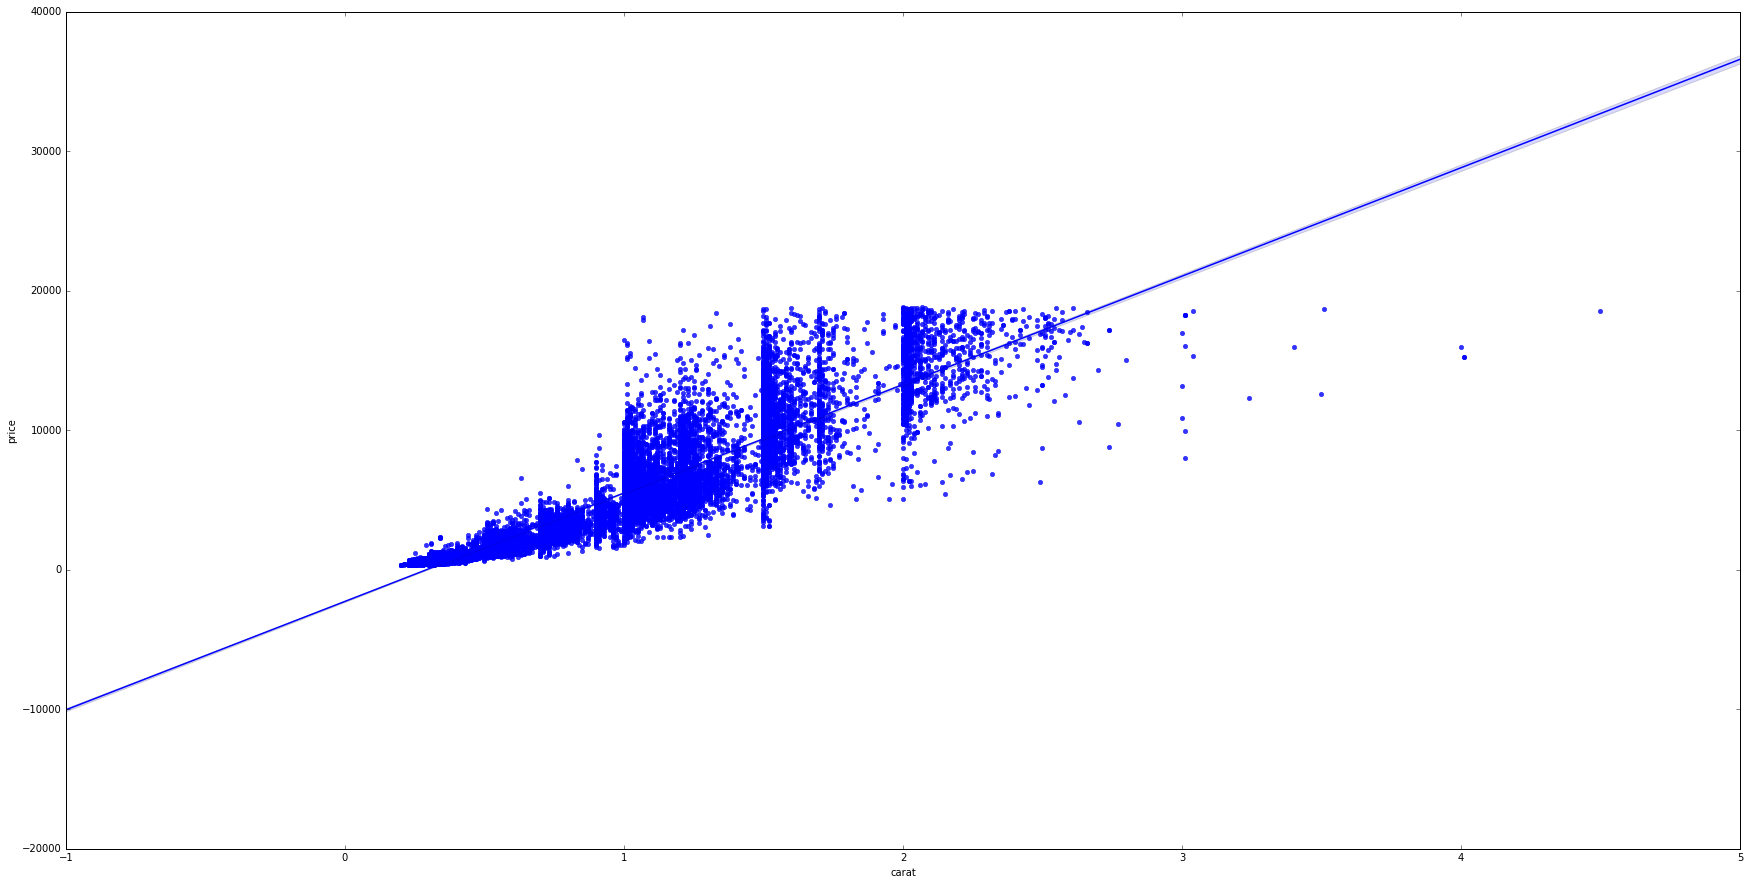

In [18]:
figure = plt.figure(figsize=(30,15))
ax = sns.regplot(x='carat',y='price', data=data ) # regression plot - scatter plot with a regression line

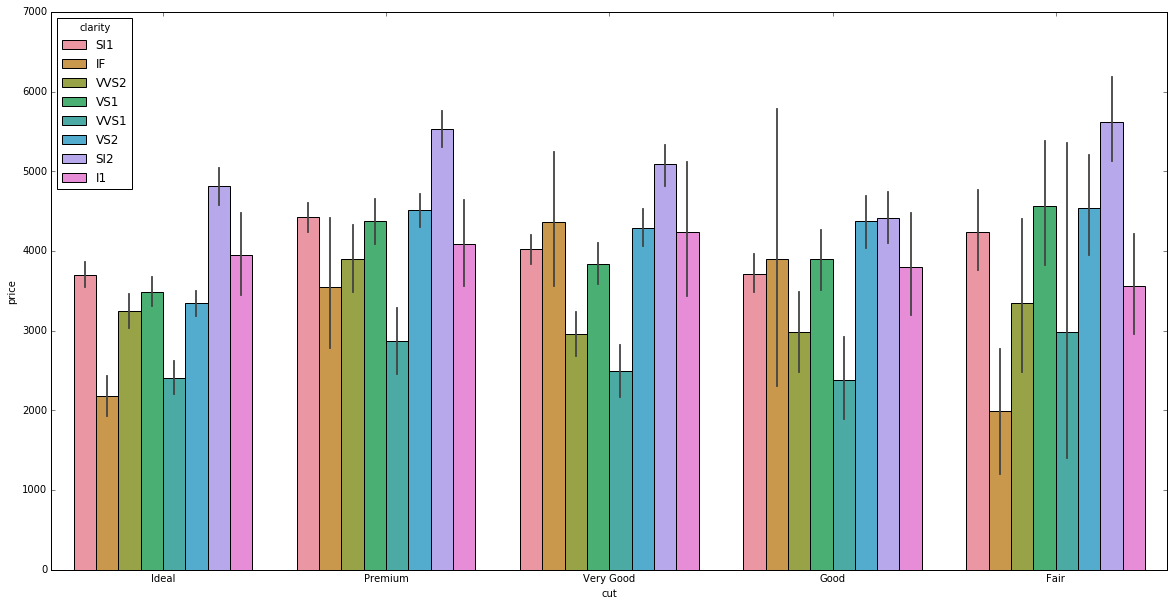

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='cut',y='price',hue='clarity')
plt.show()

In [20]:
#1.2
data.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          9
price      0
dtype: int64

In [21]:
data.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [22]:
data.mean()

carat       0.798375
depth      61.745147
table      57.456080
x           5.729854
y           5.733569
z           3.538057
price    3939.518115
dtype: float64

In [23]:
data = data.fillna(data.median())

In [24]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
data['x']=np.where(data['x'] =='0', '5.7', data['x'])
data['y']=np.where(data['y'] =='0', '5.7', data['y'])
data['z']=np.where(data['z'] =='0', '3.5', data['z'])

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [26]:
data.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [27]:
#1.3
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

data['cut'] = labelencoder.fit_transform(data.cut) # returns label encoded variable(s)
data['color'] = labelencoder.fit_transform(data.color) # returns label encoded variable(s)
data['clarity'] = labelencoder.fit_transform(data.clarity) # returns label encoded variable(s)

In [28]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.7,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [29]:
data.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
x           object
y           object
z           object
price        int64
dtype: object

In [30]:
data['x'] = data['x'].astype('float64')
data['y'] = data['y'].astype('float64')
data['z'] = data['z'].astype('float64')

In [31]:
data.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

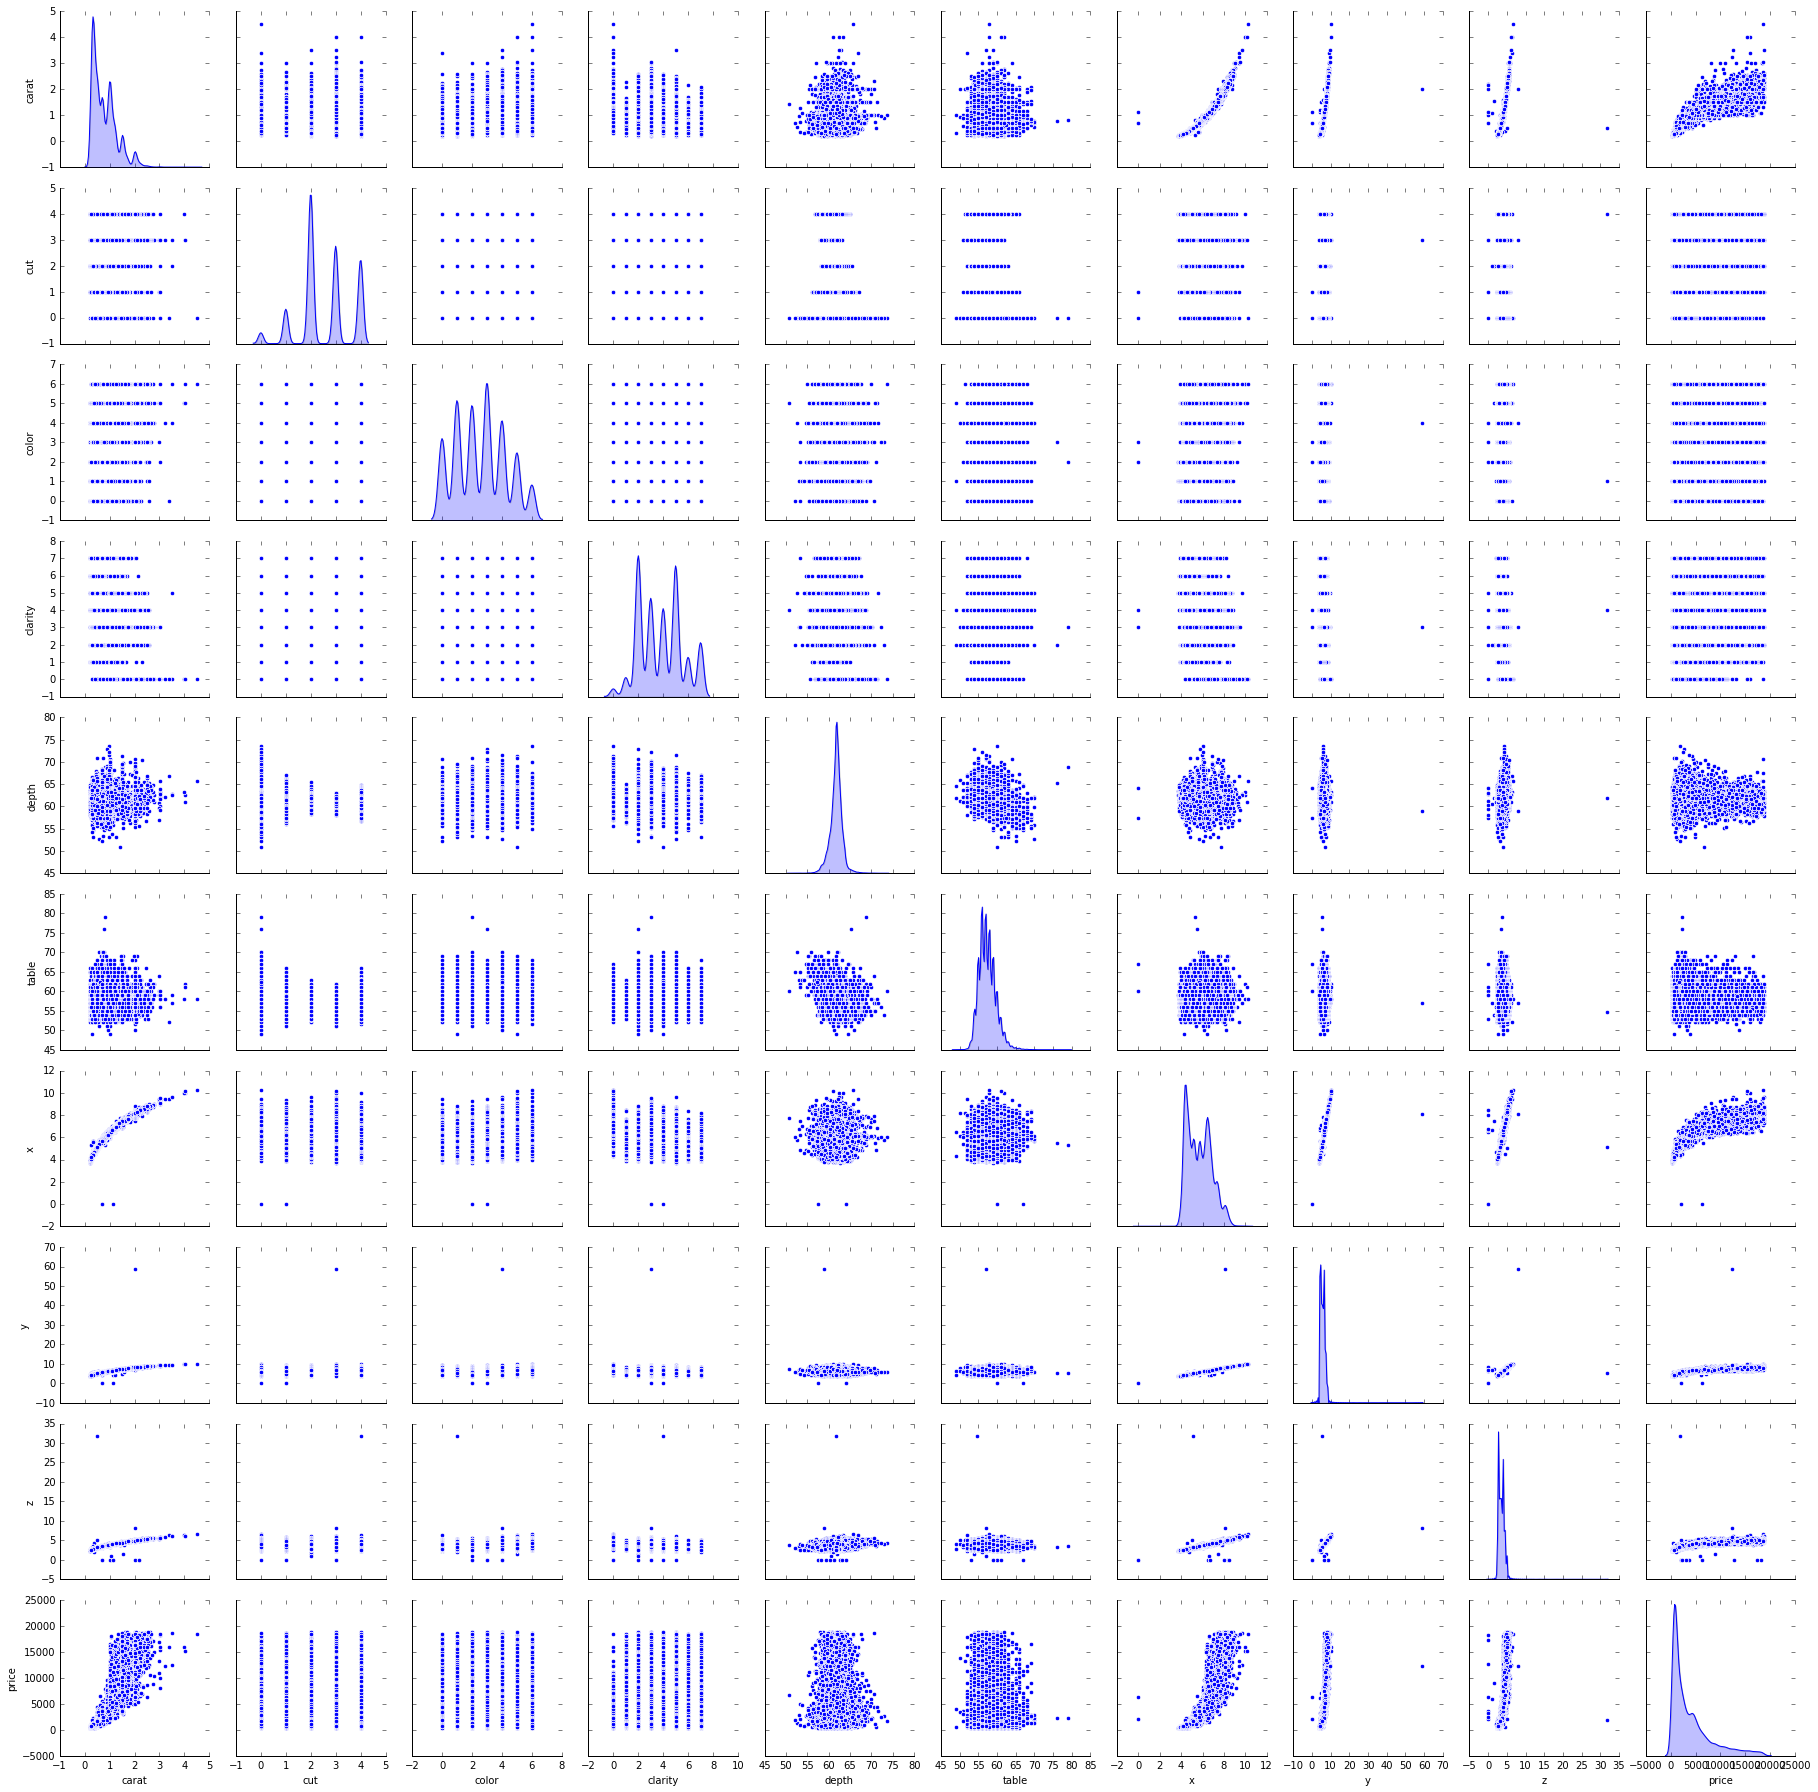

In [32]:
sns.pairplot(data, diag_kind='kde')

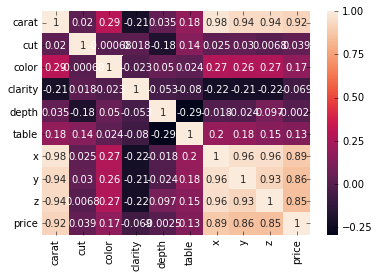

In [33]:
sns.heatmap(data.corr(),annot=True)

In [34]:
data.skew()

carat      1.116481
cut       -0.180112
color      0.188719
clarity    0.178479
depth     -0.032042
table      0.765758
x          0.387986
y          3.850189
z          2.568257
price      1.618550
dtype: float64

In [35]:
X_l = data.drop('price', axis=1)
y_l = data[['price']]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, test_size=0.30 , random_state=1)

In [38]:
regression_model = LinearRegression()
regression_model.fit(X_l_train, y_l_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_l_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 10920.532399951378
The coefficient for cut is 54.893812456290924
The coefficient for color is -272.1835143868284
The coefficient for clarity is 290.2515295778885
The coefficient for depth is -152.1061607277573
The coefficient for table is -96.95796057478472
The coefficient for x is -1092.837724064901
The coefficient for y is 1.298680514988961
The coefficient for z is -31.249919513766006


In [40]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 16015.309195447022


In [41]:
regression_model.score(X_l_train, y_l_train)

0.8869118063810129

In [42]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_l_test, y_l_test)

0.8876876019651655

In [43]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_l_train, y_l_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,0.41,2,5,7,62.3,56.0,4.77,4.73,2.96,1061
9728,1.71,2,6,2,62.8,57.0,7.58,7.55,4.75,6320
1936,0.33,1,2,2,61.8,62.0,4.40,4.45,2.74,536
26220,0.70,4,4,2,62.8,57.0,5.61,5.66,3.54,2214
18445,0.70,2,0,3,62.1,56.0,5.67,5.71,3.53,2575


In [44]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    16015.309195
carat        10920.532400
cut             54.893812
color         -272.183514
clarity        290.251530
depth         -152.106161
table          -96.957961
x            -1092.837724
y                1.298681
z              -31.249920
dtype: float64

In [45]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:03:39   Log-Likelihood:            -1.6287e+05
No. Observations:               18876   AIC:                         3.258e+05
Df Residuals:                   18866   BIC:                         3.258e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.602e+04    681.069     23.515      0.0

In [46]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases
mse = np.mean((regression_model.predict(X_l_test)-y_l_test)**2)

In [47]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
math.sqrt(mse)

1351.204079161585

In [48]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
regression_model.score(X_l_test, y_l_test)

0.8876876019651655

In [49]:
# predict mileage for a set of attributes not in the training or test set
y_l_test_pred = regression_model.predict(X_l_test)

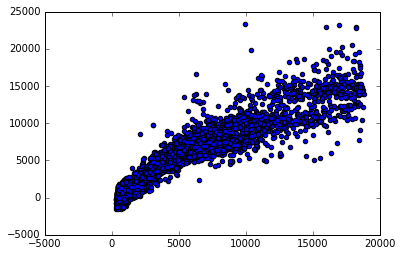

In [50]:
plt.scatter(y_l_test['price'], y_l_test_pred)

In [51]:
from scipy.stats import zscore

X_l_train_scaled  = X_l_train.apply(zscore)
X_l_test_scaled = X_l_test.apply(zscore)
y_l_train_scaled = y_l_train.apply(zscore)
y_l_test_scaled = y_l_test.apply(zscore)

In [52]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_l_train_scaled, y_l_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_l_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2981884203932201
The coefficient for cut is 0.014029789205391273
The coefficient for color is -0.1154361779834659
The coefficient for clarity is 0.12397605606404906
The coefficient for depth is -0.05276359614332049
The coefficient for table is -0.05371308482970911
The coefficient for x is -0.30652181518825744
The coefficient for y is 0.0003825747068687583
The coefficient for z is -0.005671010725680481


In [54]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.683798169200023e-16


In [55]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_l_test_scaled, y_l_test_scaled)

0.8877967037781761

In [56]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases
mse = np.mean((regression_model.predict(X_l_test_scaled)-y_l_test_scaled)**2)

In [57]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
math.sqrt(mse)

0.3349676047348817

In [58]:
# predict for a set of attributes
y_ls_test_pred = regression_model.predict(X_l_test_scaled)

In [59]:
y_ls_test_pred

array([[ 2.19430539],
       [ 1.34962685],
       [-0.8901628 ],
       ...,
       [-0.28540472],
       [ 1.17121855],
       [-0.48750799]])

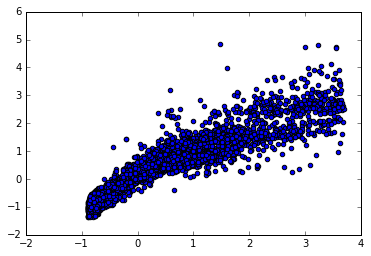

In [60]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_l_test_scaled['price'], y_ls_test_pred)

In [61]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_l_train_scaled, y_l_train_scaled], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,-0.811481,-0.546431,1.401996,1.852795,0.395675,-0.655388,-0.850025,-0.847293,-0.791858,-0.716034
9728,1.907677,-0.546431,1.988276,-1.057867,0.754075,-0.206551,1.641043,1.532944,1.660741,0.591606
1936,-0.978814,-1.519306,-0.356843,-1.057867,0.037275,2.037633,-1.178031,-1.083629,-1.093295,-0.846574
26220,-0.204900,1.399320,0.815717,-1.057867,0.754075,-0.206551,-0.105364,-0.062321,0.002839,-0.429343
18445,-0.204900,-0.546431,-1.529403,-0.475735,0.252315,-0.655388,-0.052174,-0.020119,-0.010863,-0.339581


In [62]:
import statsmodels.formula.api as smf
lm1_train = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1_train.params

Intercept    3.642919e-17
carat        1.298188e+00
cut          1.402979e-02
color       -1.154362e-01
clarity      1.239761e-01
depth       -5.276360e-02
table       -5.371308e-02
x           -3.065218e-01
y            3.825747e-04
z           -5.671011e-03
dtype: float64

In [63]:
print(lm1_train.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:03:41   Log-Likelihood:                -6212.9
No. Observations:               18876   AIC:                         1.245e+04
Df Residuals:                   18866   BIC:                         1.252e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.643e-17      0.002   1.49e-14      1.0

In [64]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_l_train_scaled, y_l_train_scaled)

0.8869118063810129

In [65]:
# Let us check the sum of squared errors by predicting value of y for testing cases and 
# subtracting from the actual y for the testing cases
mse = np.mean((regression_model.predict(X_l_train_scaled)-y_l_train_scaled)**2)

In [66]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
math.sqrt(mse)

0.33628588079041677

In [67]:
# predict for a set of attributes
y_ls_train_pred = regression_model.predict(X_l_train_scaled)

In [68]:
y_ls_train_pred

array([[-0.71421742],
       [ 1.56764845],
       [-1.12649502],
       ...,
       [ 2.68859147],
       [ 1.3349705 ],
       [ 0.49290215]])

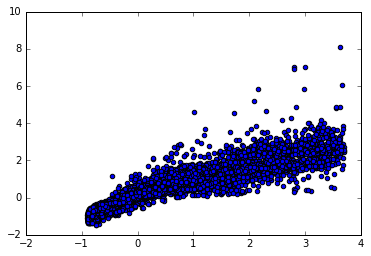

In [69]:
# Since this is regression, plot the predicted y value vs actual y values for the train data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_l_train_scaled['price'], y_ls_train_pred)

In [70]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_test = pd.concat([X_l_test_scaled, y_l_test_scaled], axis=1)
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
18031,2.538532,-2.499505,1.406184,-0.500735,3.414634,1.585396,1.839462,1.799096,2.335559,1.670255
26051,1.490121,0.454843,-0.351673,-1.075245,0.327897,0.693099,1.423377,1.397722,1.448081,1.902405
16279,-0.627671,1.439625,0.820232,-1.075245,-0.605303,1.585396,-0.595077,-0.519955,-0.613160,-0.695394
16466,-1.026067,-0.529940,-0.937625,0.073775,0.040759,-0.645347,-1.188219,-1.153234,-1.257298,-0.821142
19837,0.840105,1.439625,0.820232,0.073775,0.184328,-0.199198,0.918764,0.960670,0.961399,0.555637


In [71]:
import statsmodels.formula.api as smf
lm1_test = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_test).fit()
lm1_test.params

Intercept    1.734723e-17
carat        1.373465e+00
cut          1.897413e-02
color       -1.180033e-01
clarity      1.260046e-01
depth       -4.151668e-02
table       -4.834367e-02
x           -7.323547e-01
y            4.671369e-01
z           -1.232962e-01
dtype: float64

In [72]:
print(lm1_test.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     7191.
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:03:42   Log-Likelihood:                -2587.6
No. Observations:                8091   AIC:                             5195.
Df Residuals:                    8081   BIC:                             5265.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.735e-17      0.004   4.68e-15      1.0

In [73]:
#2.1
data1 = pd.read_csv('Holiday_Package.csv')

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [75]:
data1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [76]:
data1=data1.drop('Unnamed: 0',axis=1)

In [77]:
data1.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [78]:
data1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

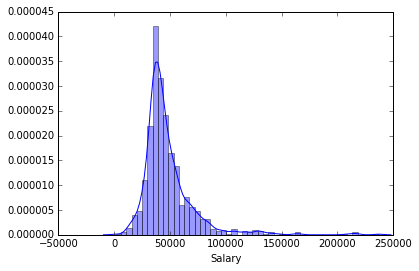

In [79]:
sns.distplot(data1['Salary'])

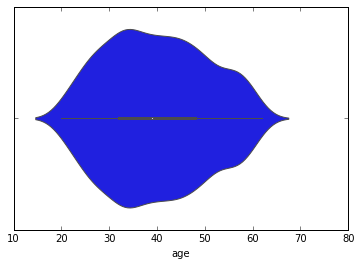

In [80]:
sns.violinplot(data1['age'])

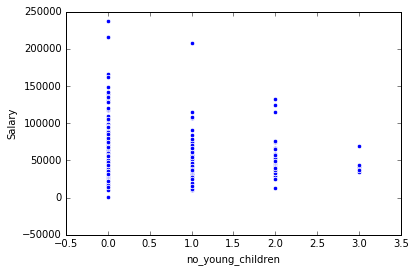

In [81]:
sns.scatterplot(data1['no_young_children'], data1['Salary'])

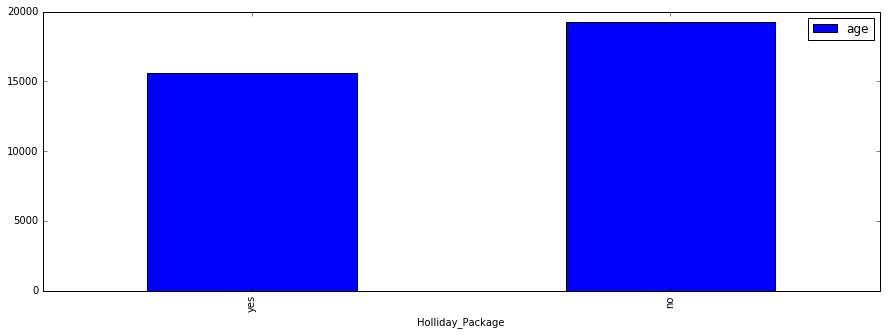

In [82]:
data1.groupby(by=['Holliday_Package'])['age'].sum().reset_index().sort_values(['age']).tail(10).plot(x='Holliday_Package',y='age',kind='bar',figsize=(15,5))
plt.show()

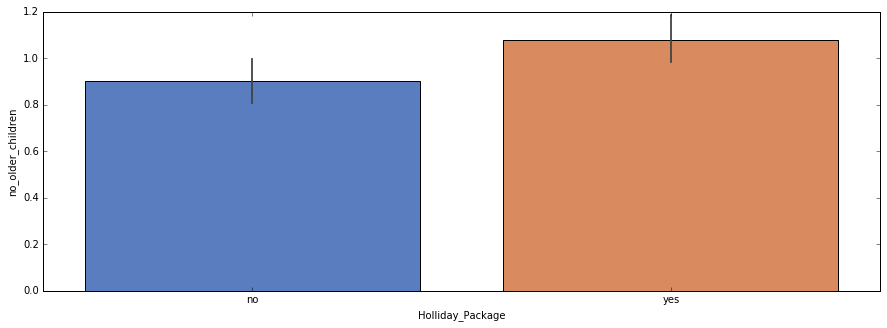

In [83]:
plt.figure(figsize=(15,5))  # setting the figure size
ax = sns.barplot(x='Holliday_Package', y='no_older_children', data=data1, palette='muted')  # barplot

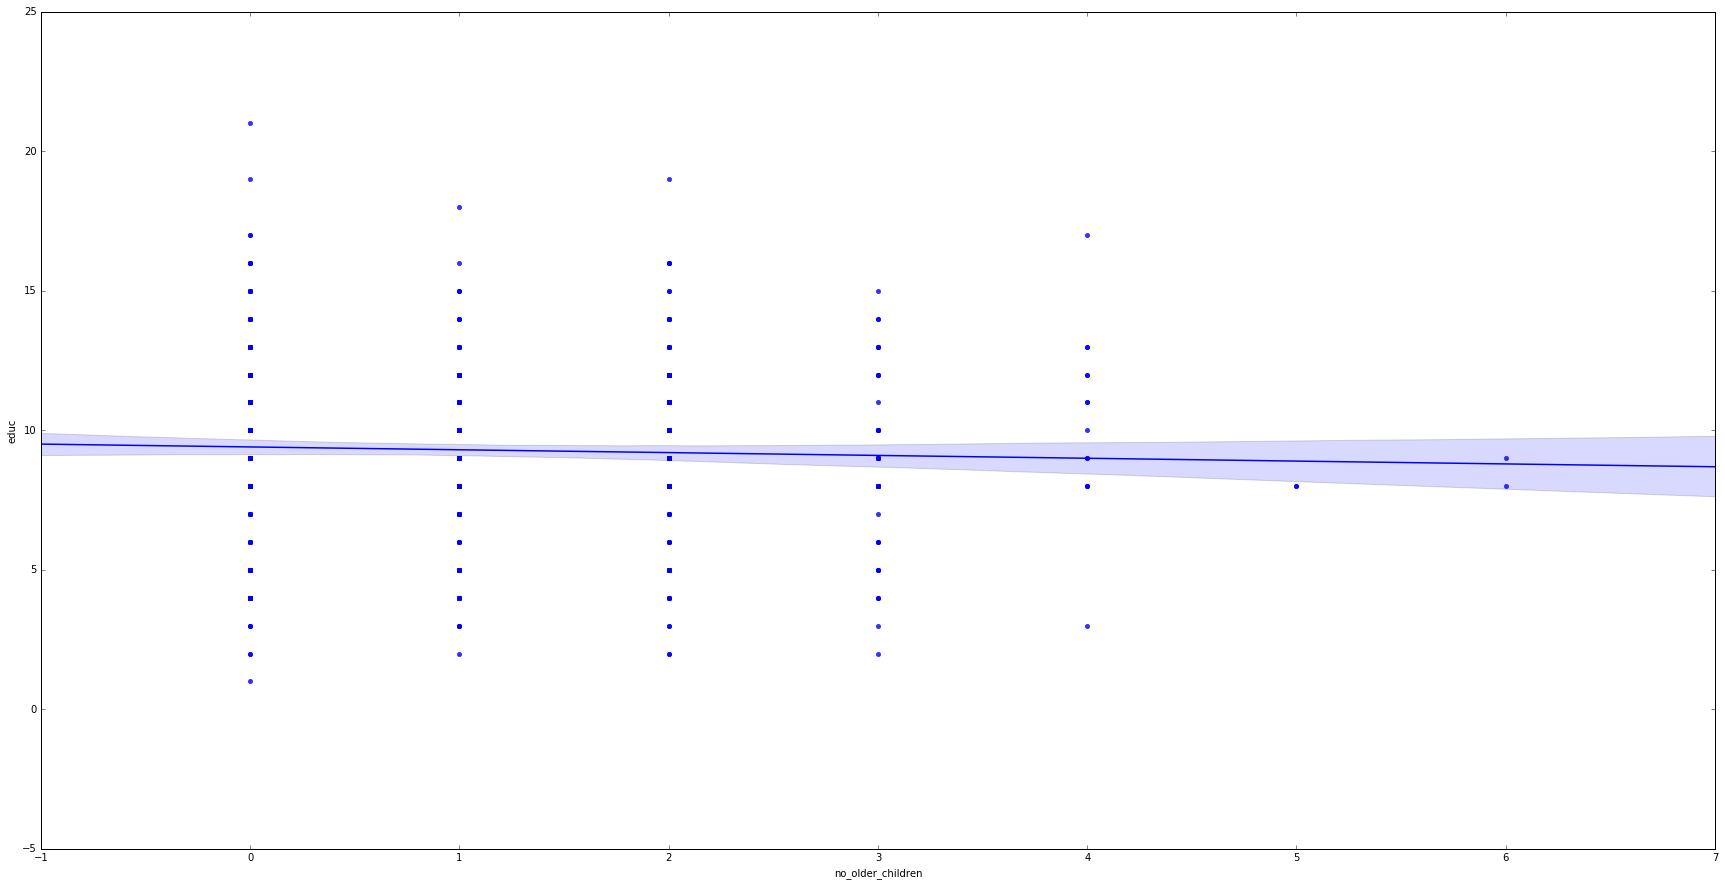

In [84]:
figure = plt.figure(figsize=(30,15))
ax = sns.regplot(x='no_older_children',y='educ', data=data1 ) # regression plot - scatter plot with a regression line

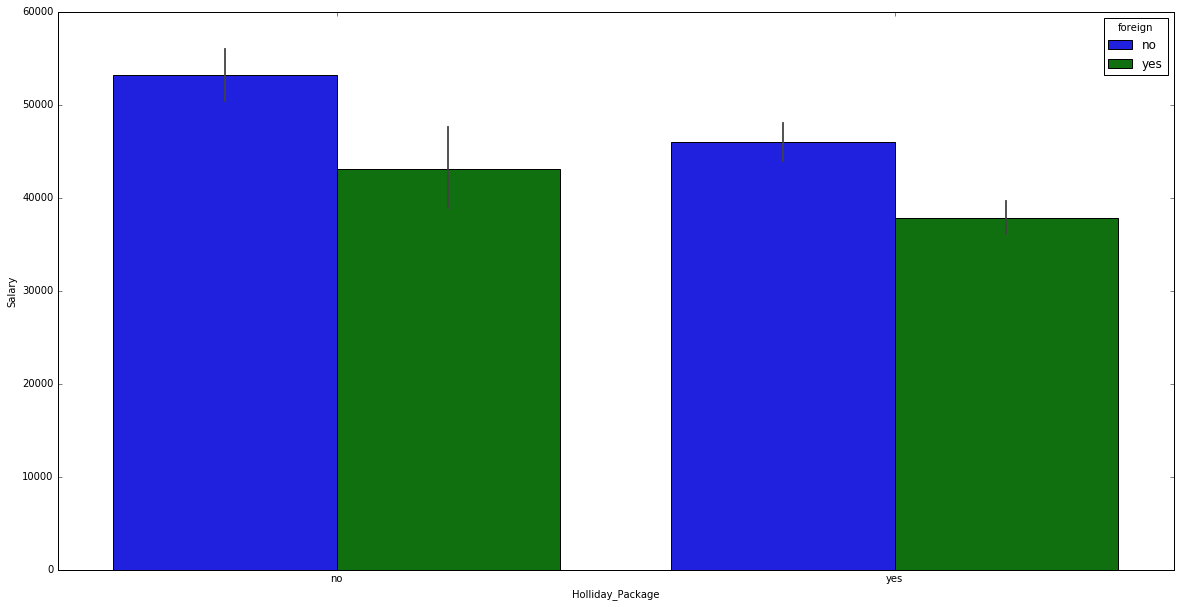

In [85]:
plt.figure(figsize=(20,10))
sns.barplot(data=data1,x='Holliday_Package',y='Salary',hue='foreign')
plt.show()

In [86]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Salary               18145.5
age                     16.0
educ                     4.0
no_young_children        0.0
no_older_children        2.0
dtype: float64


In [87]:
#2.2
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

data1['Holliday_Package'] = labelencoder.fit_transform(data1.Holliday_Package) # returns label encoded variable(s)
data1['foreign'] = labelencoder.fit_transform(data1.foreign)

In [88]:
data1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [89]:
data1.dtypes

Holliday_Package     int32
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign              int32
dtype: object

In [90]:
data1.skew()

Holliday_Package     0.161348
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
foreign              1.170906
dtype: float64

In [91]:
data1.cov()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,0.248674,-2.168586e+03,-0.485724,-0.155273,-0.052908,0.043511,0.054730
Salary,-2168.585510,5.484340e+08,17719.779229,23218.662341,-425.752915,2895.613755,-2033.582269
age,-0.485724,1.771978e+04,111.337837,-4.783024,-3.356871,-1.332573,-0.488335
educ,-0.155273,2.321866e+04,-4.783024,9.218867,0.183012,-0.119851,-0.550385
no_young_children,-0.052908,-4.257529e+02,-3.356871,0.183012,0.375610,-0.158807,0.022530
no_older_children,0.043511,2.895614e+03,-1.332573,-0.119851,-0.158807,1.181104,0.010006
foreign,0.054730,-2.033582e+03,-0.488335,-0.550385,0.022530,0.010006,0.186562


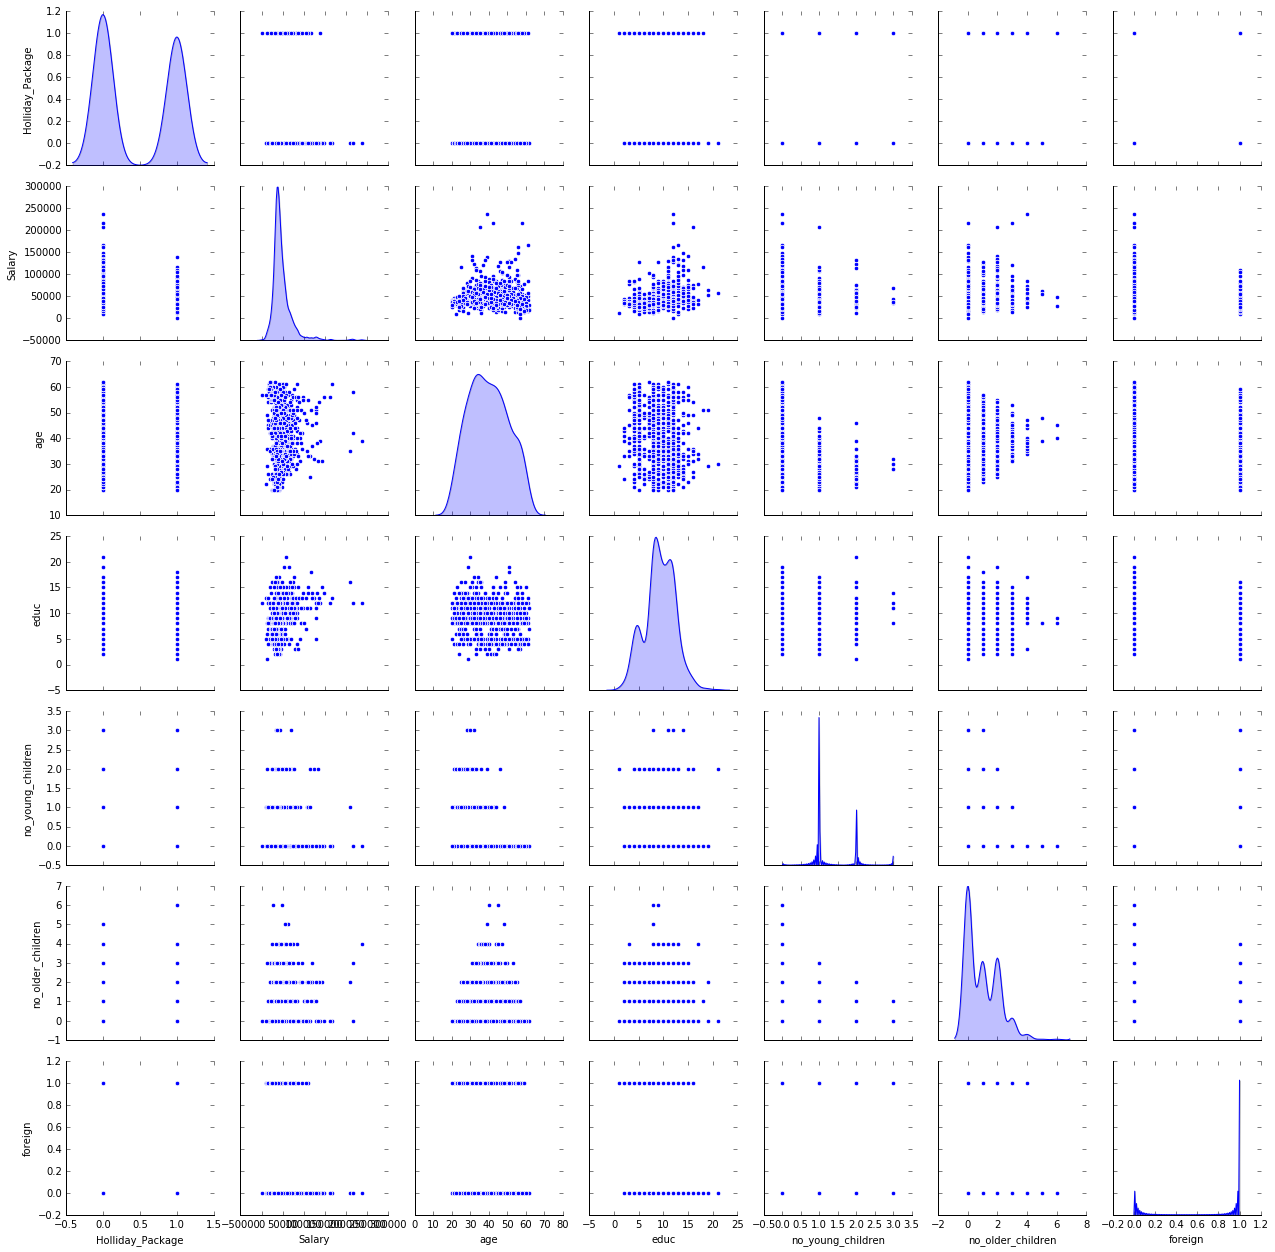

In [92]:
sns.pairplot(data1, diag_kind='kde')

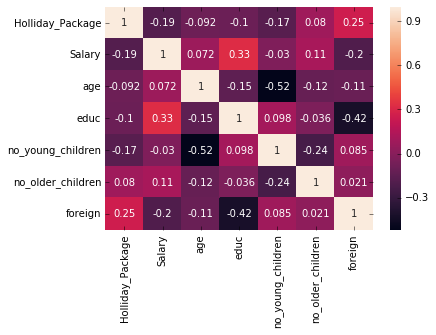

In [93]:
sns.heatmap(data1.corr(),annot=True)

In [94]:
#LogisticRegression
X_log = data1.drop('Holliday_Package',axis=1)
Y_log = data1.Holliday_Package
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, Y_log, test_size=0.30, random_state=1)

In [95]:
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X_log_train, y_log_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
#LDA
X_lda = data1.drop("Holliday_Package" , axis=1)
y_lda = data1.pop("Holliday_Package")
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(X_lda, y_lda, test_size=.30, random_state=1)

In [97]:
clf = LinearDiscriminantAnalysis()

In [98]:
model_lda=clf.fit(X_lda_train,y_lda_train)
model_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [99]:
#2.3
y_log_test_predict = model_log.predict(X_log_test)
y_log_train_predict = model_log.predict(X_log_train)

In [100]:
y_log_test_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [101]:
y_log_train_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [102]:
# Accuracy - Testing Data
model_log.score(X_log_test,y_log_test)

0.6335877862595419

In [103]:
# Accuracy - Training Data
model_log.score(X_log_train,y_log_train)

0.6540983606557377

In [104]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_log_test, y_log_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_log_test, y_log_test_predict))

Confusion Matrix 
 [[96 49]
 [47 70]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.66      0.67       145
           1       0.59      0.60      0.59       117

    accuracy                           0.63       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.63      0.63      0.63       262



In [105]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_log_train, y_log_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_log_train, y_log_train_predict))

Confusion Matrix 
 [[223 103]
 [108 176]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.68      0.68       326
           1       0.63      0.62      0.63       284

    accuracy                           0.65       610
   macro avg       0.65      0.65      0.65       610
weighted avg       0.65      0.65      0.65       610



AUC: 0.721


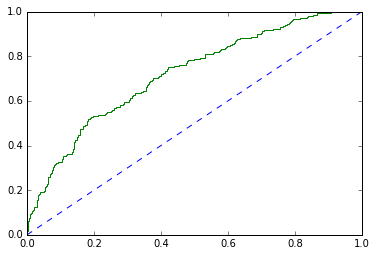

In [106]:
# predict probabilities
probs_log_train = model_log.predict_proba(X_log_train)
# keep probabilities for the positive outcome only
probs_log_train = probs_log_train[:, 1]
# calculate AUC
auc_log_train = roc_auc_score(y_log_train, probs_log_train)
print('AUC: %.3f' % auc_log_train)
# calculate roc curve
train_fpr_log, train_tpr_log, train_thresholds_log = roc_curve(y_log_train, probs_log_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_log, train_tpr_log)

AUC: 0.687


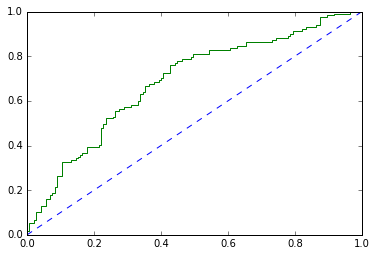

In [107]:
# predict probabilities
probs_log_test = model_log.predict_proba(X_log_test)
# keep probabilities for the positive outcome only
probs_log_test = probs_log_test[:, 1]
# calculate AUC
auc_log_test = roc_auc_score(y_log_test, probs_log_test)
print('AUC: %.3f' % auc_log_test)
# calculate roc curve
test_fpr_log, test_tpr_log, test_thresholds_log = roc_curve(y_log_test, probs_log_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_log, test_tpr_log)

In [108]:
y_lda_test_predict = model_lda.predict(X_lda_test)
y_lda_train_predict = model_lda.predict(X_lda_train)

In [109]:
y_lda_test_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [110]:
y_lda_train_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [111]:
# Accuracy - Testing Data
model_lda.score(X_lda_test,y_lda_test)

0.6412213740458015

In [112]:
# Accuracy - Training Data
model_lda.score(X_lda_train,y_lda_train)

0.6721311475409836

In [113]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_lda_test, y_lda_test_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_lda_test, y_lda_test_predict))

Confusion Matrix 
 [[103  42]
 [ 52  65]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [114]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_lda_train, y_lda_train_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_lda_train, y_lda_train_predict))

Confusion Matrix 
 [[252  74]
 [126 158]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



AUC: 0.742


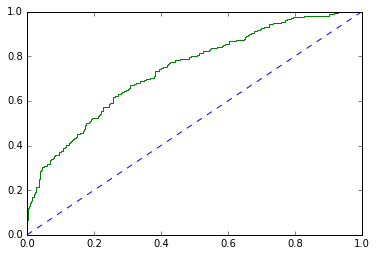

In [115]:
# predict probabilities
probs_lda_train = model_lda.predict_proba(X_lda_train)
# keep probabilities for the positive outcome only
probs_lda_train = probs_lda_train[:, 1]
# calculate AUC
auc_lda_train = roc_auc_score(y_lda_train, probs_lda_train)
print('AUC: %.3f' % auc_lda_train)
# calculate roc curve
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_lda_train, probs_lda_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda)

AUC: 0.703


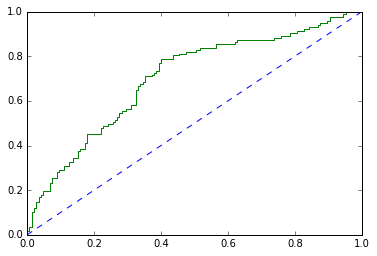

In [116]:
# predict probabilities
probs_lda_test = model_lda.predict_proba(X_lda_test)
# keep probabilities for the positive outcome only
probs_lda_test = probs_lda_test[:, 1]
# calculate AUC
auc_lda_test = roc_auc_score(y_lda_test, probs_lda_test)
print('AUC: %.3f' % auc_lda_test)
# calculate roc curve
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_lda_test, probs_lda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_lda, test_tpr_lda)